# Linear Models Regularization

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import numpy as np
import pandas as pd
from addutils import css_notebook
from sklearn.datasets.samples_generator import make_regression
from sklearn import linear_model
from sklearn import metrics
css_notebook()

In [3]:
import bokeh.plotting as bk
from bokeh import palettes
from bokeh.layouts import gridplot
bk.output_notebook()

Loading BokehJS ...

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1 Introduction

We talked about linear models, but we know from real life situations that it is not always the case. How can we transform linear models to be able to cope with nonlinearity?

### 1.1 Going beyond linearity

I have simulated a sine curve (between 60° and 300°) and added some random noise using the following code:

In [5]:
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
fig = bk.figure(plot_width=630, plot_height=300, title=None)
fig.circle(data['x'], data['y'],)
bk.show(fig)

This resembles a sine curve but not exactly because of the noise. We’ll use this as an example to test different scenarios in this article. Lets try to estimate the sine function using polynomial regression with powers of x form 1 to 15. Lets add a column for each power upto 15 in our dataframe. This can be accomplished using the following code:

In [6]:
for i in range(2,16):  #power of 1 is already there
    data['x_{}'.format(i)] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

In [7]:
def linear_power_model(model, data, power):
    #initialize predictors:
    predictors=['x']
    if power >= 2:
        predictors += ['x_{}'.format(i) for i in range(2,power+1)]
    
    #Fit the model
    model.fit(data[predictors],data['y'])
    y_pred = model.predict(data[predictors])
 
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret, y_pred

In [8]:
results = {}
regr = linear_model.LinearRegression(normalize=True)
for i in range(1,16):
    results[i] = linear_power_model(regr, data, i)

In [9]:
grid = []
for m in [1, 3, 6, 9, 12, 15]:
    p = bk.figure(plot_width=230, plot_height=300, title='Plot for power {}'.format(m))
    p.circle(data['x'], data['y'],)
    p.line(data['x'], results[m][1], color='firebrick')
    grid.append(p)
bk.show(gridplot(grid, ncols=3))

In [10]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = results[i][0]

In [11]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. I hope this gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.

Lets try to understand this even better.

What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

## 2 Ridge Regression

Linear Regression rely on the independence of the model terms. When terms are correlated and the columns of the design matrix $X$; have an approximate linear dependence, the matrix $(X^TX)^{-1}$ becomes
close to singular. As a result, the least-squares estimate becomes highly sensitive to random errors in the observed response *y*, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

The ridge coefficients minimize a penalized residual sum of squares:

$$ \underset{w}{min} \|Xw -y\|_2^2 + \alpha \|w\|_2^2$$

Here, positive $\alpha  \geq 0 \hspace{2 pt}$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We’ll find out soon. Lets see ridge regression in action on the same problem as above.

In [12]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
results = {}
for alpha in alpha_ridge:
    ridgereg = linear_model.Ridge(alpha=alpha,normalize=True)
    results[alpha] = linear_power_model(ridgereg, data, 15)

In [13]:
grid = []
for m in [1e-15, 1e-10, 1e-3, 1e-2, 1, 5]:
    p = bk.figure(plot_width=230, plot_height=300, title='Plot for alpha {}'.format(m))
    p.circle(data['x'], data['y'],)
    p.line(data['x'], results[m][1], color='firebrick')
    grid.append(p)
bk.show(gridplot(grid, ncols=3))

In [14]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

for i,e in enumerate(alpha_ridge):
    coef_matrix_ridge.iloc[i,] = results[e][0]

In [15]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


This straight away gives us the following inferences:

* The RSS increases with increase in alpha, this model complexity reduces
* An alpha as small as 1e-15 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
* High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
* Though the coefficients are very very small, they are NOT zero.

The first 3 are very intuitive. But #4 is also a crucial observation. Let’s reconfirm the same by determining the number of zeros in each row of the coefficients data set:

In [16]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

This confirms that all the 15 coefficients are greater than zero in magnitude (can be +ve or -ve). Remember this observation and have a look again until its clear. This will play an important role in later while comparing ridge with lasso regression.

## 3 LASSO

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha$ $||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1$-norm of the parameter vector.

In [17]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
results = {}
for alpha in alpha_lasso:
    lassoreg = linear_model.Lasso(alpha=alpha, normalize=True)
    results[alpha] = linear_power_model(lassoreg, data, 15)

In [18]:
grid = []
for m in [1e-15, 1e-10, 1e-3, 1e-4, 1e-2, 1]:
    p = bk.figure(plot_width=230, plot_height=300, title='Plot for alpha {}'.format(m))
    p.circle(data['x'], data['y'],)
    p.line(data['x'], results[m][1], color='firebrick')
    grid.append(p)
bk.show(gridplot(grid, ncols=3))

This again tells us that the model complexity decreases with increase in the values of alpha. But notice the straight line at alpha=1. Appears a bit strange to me. Let’s explore this further by looking at the coefficients:

In [19]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

for i,e in enumerate(alpha_lasso):
    coef_matrix_lasso.iloc[i,] = results[e][0]

In [20]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-10,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_1e-08,0.97,0.14,1.1,-0.3,-0.024,-0.00052,0.0003,8.8e-05,1.7e-05,2.9e-06,4.1e-07,4.7e-08,2.9e-09,-5.3e-10,-3e-10,-9e-11,-2.3e-11
alpha_0.0001,1,0.61,0.6,-0.19,-0.022,-0,-0,1.1e-05,2.4e-05,3.2e-06,3.2e-07,4.4e-09,0,0,-0,-0,-2.9e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_20,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


Apart from the expected inference of higher RSS for higher alphas, we can see the following:

* For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
* For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression
* Many of the coefficients are zero even for very small values of alpha

The first two points might not be always true but will hold for many cases. The real difference from ridge is coming out in the last inference. Lets check the number of coefficients which are zero in each model using following code:

In [21]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_0.0001     6
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
alpha_20        15
dtype: int64

We can observe that even for a small value of alpha, a significant number of coefficients are zero. This also explains the horizontal line fit for alpha=1 in the lasso plots, its just a baseline model! This phenomenon of most of the coefficients being zero is called "sparsity". 

Lasso can perform **feature selection**, especially where sparsity in data is a correct assumption, for example for problems where $p >> n$ such as micro array data.

## 4 Remarks

1. Key Difference

    * Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
    * Lasso: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

2. Typical Use Cases

    * Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
    * Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

3. Presence of Highly Correlated Features

    * Ridge: It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.
    * Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.

Along with Ridge and Lasso, **Elastic Net** is another useful techniques which combines both L1 and L2 regularization. It can be used to balance out the pros and cons of ridge and lasso regression. I encourage you to explore it further.

## 5 ElasticNet

ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$

The main difference between Lasso and Ridge is the penalty term they use. Ridge uses L2 penalty term which limits the size of the coefficient vector. Lasso uses L1 penalty which imposes sparsity among the coefficients and thus, makes the fitted model more interpretable. Elasticnet is introduced as a compromise between these two techniques, and has a penalty which is a mix of L1 and L2 norms.

In the $p<<n$ case (p number of coefficients, n number of samples, which by the number of coefficients you show in the plots I guess it is the case here), the only real problem with the Lasso model is that when multiple features are correlated it tends to select one of then somewhat randomly. 

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


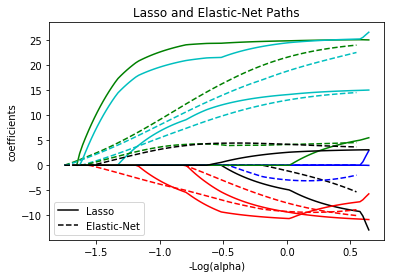

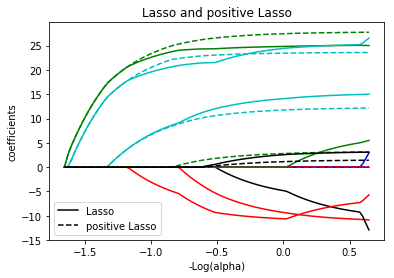

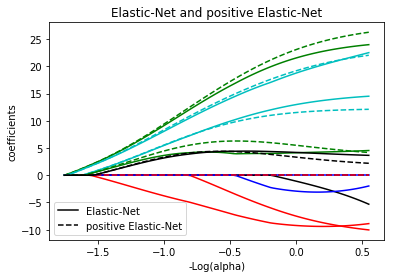

In [22]:
%matplotlib inline
from itertools import cycle

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps, positive=True, fit_intercept=False)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.figure(2)
ax = plt.gca()
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
plt.axis('tight')


plt.figure(3)
ax = plt.gca()
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
           loc='lower left')
plt.axis('tight')
plt.show()

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.